[Librerias](https://colab.research.google.com/drive/1_qpATIIr568GKmkKVZxql2WoMbjoXgEs#scrollTo=qebfM-8v1Ynu)

[Data Set](https://colab.research.google.com/drive/1_qpATIIr568GKmkKVZxql2WoMbjoXgEs#scrollTo=qebfM-8v1Ynu)

[Feature Engineering ](https://colab.research.google.com/drive/1_qpATIIr568GKmkKVZxql2WoMbjoXgEs#scrollTo=r7iWqRLL0uv2)

[Vizualición de Tablas](https://colab.research.google.com/drive/1_qpATIIr568GKmkKVZxql2WoMbjoXgEs#scrollTo=-ZVDAU2T04HX)

[Correlación](https://colab.research.google.com/drive/1_qpATIIr568GKmkKVZxql2WoMbjoXgEs#scrollTo=SUu7Oy7m1EnL)

[Modelo de Machine Learning](https://colab.research.google.com/drive/1_qpATIIr568GKmkKVZxql2WoMbjoXgEs#scrollTo=KWwhIsjX1Jxr)

# LIBRERIAS


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#para montar en drive
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision

from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression #regresion logistica

from sklearn.cluster import KMeans

# DATA SET

El objetivo de este proyecto es realizar un analisis del dataset " Covid Data" con el fin de establecer los riesgos de muerte basados en datos historicos relacionados a diferentes tipos de enfermedades.
Utilizaremos gráficos de la librería de Python para analizar de manera visual las variables elegidas e intentar responder los cuestionamientos sobre la información que contiene nuestro dataset. Como, por ejemplo:

¿que edad tiene mayor riesgo de muerte?
¿qué enfermadades son las de mayor riesgo al contraer covid?
¿qué conjunto de enfermedades pudieran causar muerte al contraer covid?

# hipotesis:Los riesgos para personas mayores, con enfermedades respiratorias son mas susceptibles a sufrir complicaciones al contar con Covid 

In [ ]:
covid = pd.read_csv('/content/gdrive/MyDrive/coderhouse/Covid Data.csv')
covid

Analisis de numeros nulos en columnas

In [ ]:
covid.isna().sum()

In [ ]:
covid.dtypes

Para poder tener una interpretación de los datos mas accesible y entendible, realizamos la conversion de los datos reemplanzandolos

In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
sex: 1 for female and 2 for male.

* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# FEATURE ENGINEERING

Creación de una nueva columna "deaths" en la cual refleje si la persona fallecio o vive 

In [ ]:
covid["deaths"] = [0 if each=="9999-99-99" else 1 for each in covid.DATE_DIED]

Reemplazo de datos para tener variables booleanas

In [ ]:
covid['INTUBED'] = covid['INTUBED'].replace(97,0)
covid['INTUBED'] = covid['INTUBED'].replace([2,99],1)
covid['PNEUMONIA'] = covid['PNEUMONIA'].replace(2,0)
covid['PNEUMONIA'] = covid['PNEUMONIA'].replace(99,1)
covid['PREGNANT'] = covid['PREGNANT'].replace(97,0)
covid['PREGNANT'] = covid['PREGNANT'].replace([2,98],1)
covid['DIABETES'] = covid['DIABETES'].replace(2,0)
covid['DIABETES'] = covid['DIABETES'].replace(98,1)
covid['COPD'] = covid['COPD'].replace(2,0)
covid['COPD'] = covid['COPD'].replace(98,1)
covid['ASTHMA'] = covid['ASTHMA'].replace(2,0)
covid['ASTHMA'] = covid['ASTHMA'].replace(98,1)
covid['INMSUPR'] = covid['INMSUPR'].replace(2,0)
covid['INMSUPR'] = covid['INMSUPR'].replace(98,1)
covid['HIPERTENSION'] = covid['HIPERTENSION'].replace(2,0)
covid['HIPERTENSION'] = covid['HIPERTENSION'].replace(98,1)
covid['OTHER_DISEASE'] = covid['OTHER_DISEASE'].replace(2,0)
covid['OTHER_DISEASE'] = covid['OTHER_DISEASE'].replace(98,1)
covid['CARDIOVASCULAR'] = covid['CARDIOVASCULAR'].replace(2,0)
covid['CARDIOVASCULAR'] = covid['CARDIOVASCULAR'].replace(98,1)
covid['OBESITY'] = covid['OBESITY'].replace(2,0)
covid['OBESITY'] = covid['OBESITY'].replace(98,1)
covid['TOBACCO'] = covid['TOBACCO'].replace(2,0)
covid['TOBACCO'] = covid['TOBACCO'].replace(98,1)
covid['ICU'] = covid['ICU'].replace(97,0)
covid['ICU'] = covid['ICU'].replace([2,99],1)
covid['RENAL_CHRONIC'] = covid['RENAL_CHRONIC'].replace(2,0)
covid['RENAL_CHRONIC'] = covid['RENAL_CHRONIC'].replace(98,1)

In [ ]:
covid.head()

In [ ]:
covid.describe()

# VISUALIZACIÓN TABLAS

Para obtener una mejor Visualización de enfermedades con la relación a muertes utilizamos las siguientes tablas en las cuales ya con los datos transormados podemos ver las enfermedades que se ven mas afectadas por el covid, ya que ademas hacemos la division de datos basado en muertes o sobrevivientes 

<Axes: xlabel='TOBACCO', ylabel='Count'>

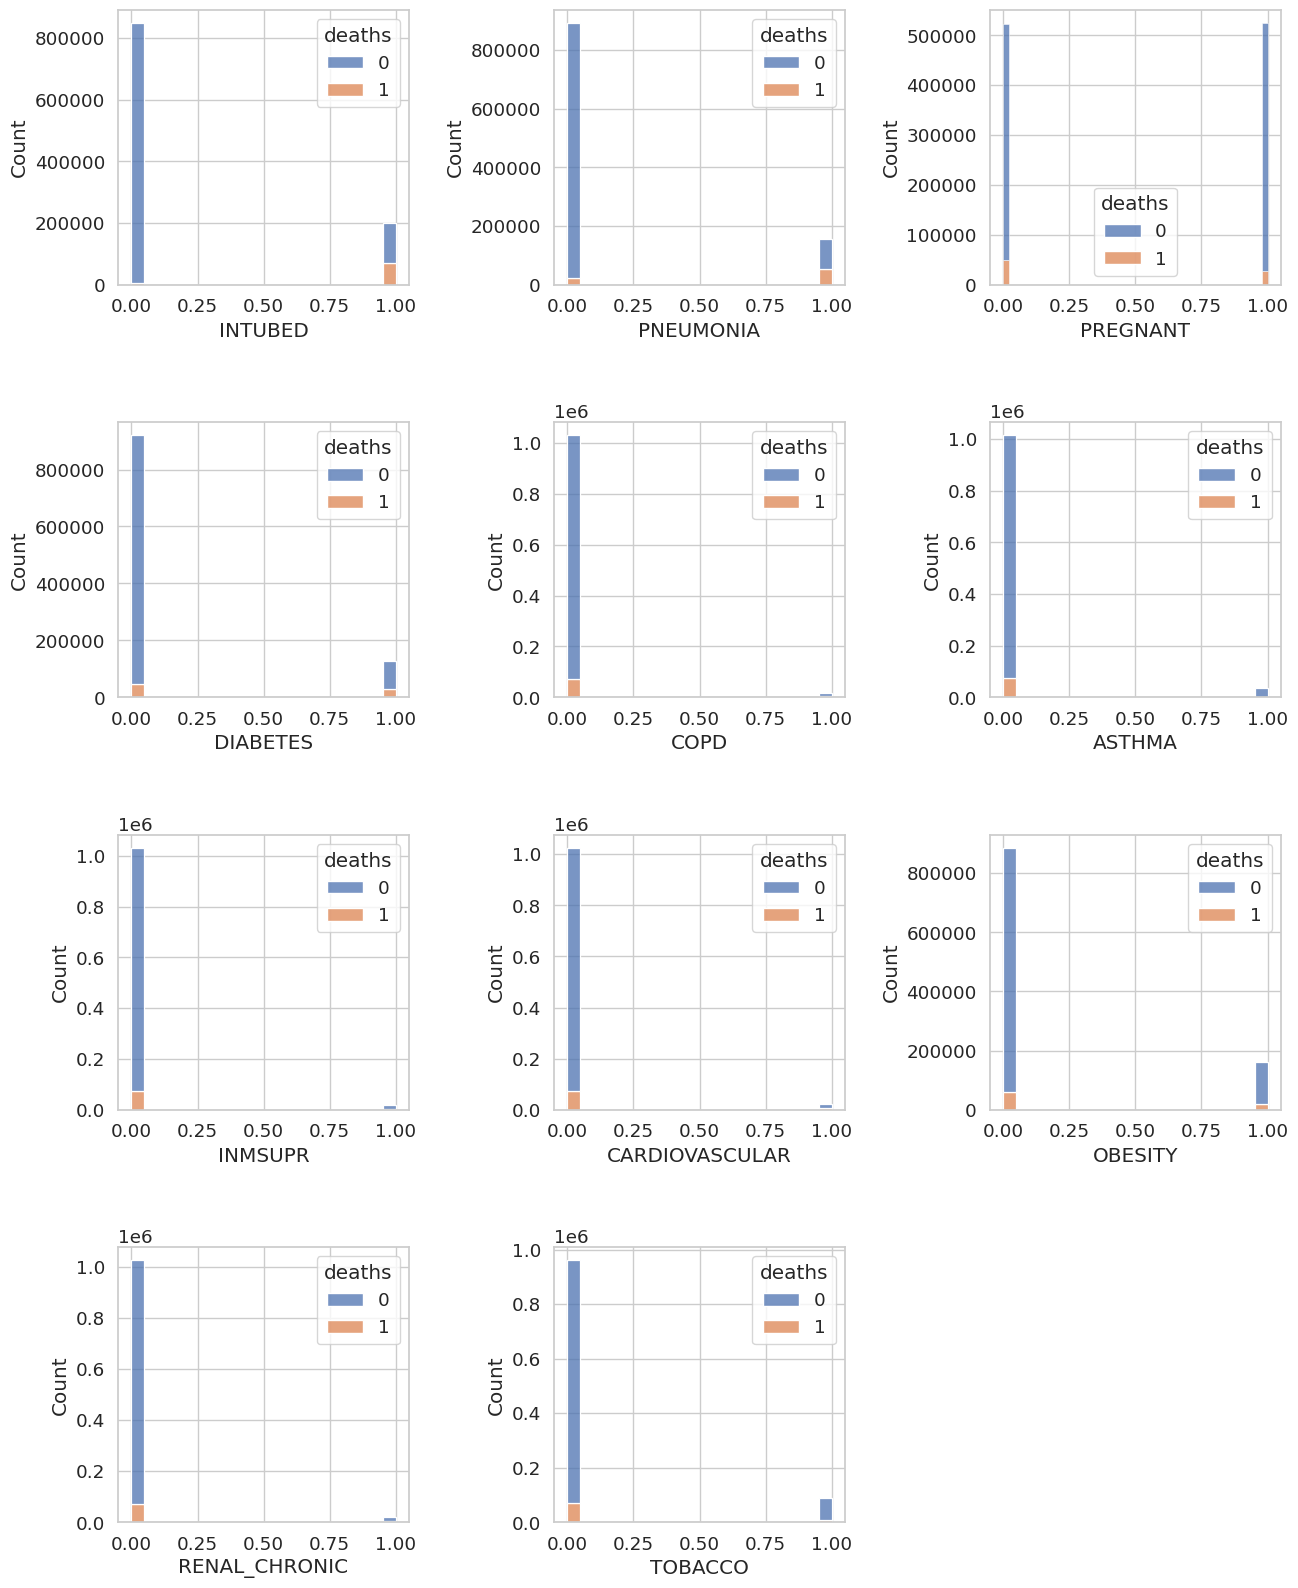

In [ ]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=.5, wspace=.5)
ax = fig.add_subplot(5,3,1)
sns.histplot(data=covid, 
             x="INTUBED", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,2)
sns.histplot(data=covid, 
             x="PNEUMONIA", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,3)
sns.histplot(data=covid, 
             x="PREGNANT", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,4)
sns.histplot(data=covid, 
             x="DIABETES", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,5)
sns.histplot(data=covid, 
             x="COPD", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,6)
sns.histplot(data=covid, 
             x="ASTHMA", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,7)
sns.histplot(data=covid, 
             x="INMSUPR", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,8)
sns.histplot(data=covid, 
             x="CARDIOVASCULAR", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,9)
sns.histplot(data=covid, 
             x="OBESITY", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,10)
sns.histplot(data=covid, 
             x="RENAL_CHRONIC", 
             hue="deaths",
             multiple="stack"
             )
ax = fig.add_subplot(5,3,11)
sns.histplot(data=covid, 
             x="TOBACCO", 
             hue="deaths",
             multiple="stack"
             )

En el siguiente grafico realizamos una grafica la cual nos ayuda a ver la cantidad de contagias dependiendo de la edad de las personas, en el cual nos podemos dar cuenta que las personas entre 20 a 50 años fueron las que tuvieron mayor cantidad de contagios, sin embargo gran porcentaje se recupero, no podemos decir lo mismo para las personas entre un rango de 60 a 100, en los cuales lamentablemente gran porcentaje de las personas pierden la vida

<Axes: xlabel='AGE', ylabel='Count'>

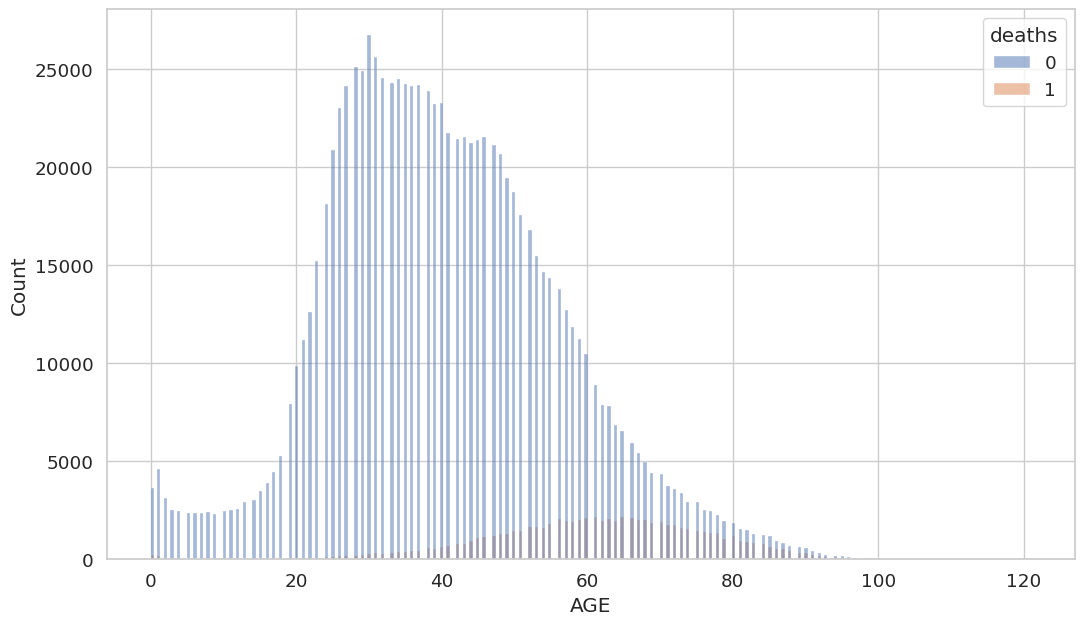

In [ ]:
fig = plt.figure(figsize=(50,50))
fig.subplots_adjust(hspace=.5, wspace=.5)
ax = fig.add_subplot(5,3,1)
sns.histplot(data=covid, 
             x="AGE",
             hue="deaths" 
             )

<Axes: xlabel='AGE', ylabel='Count'>

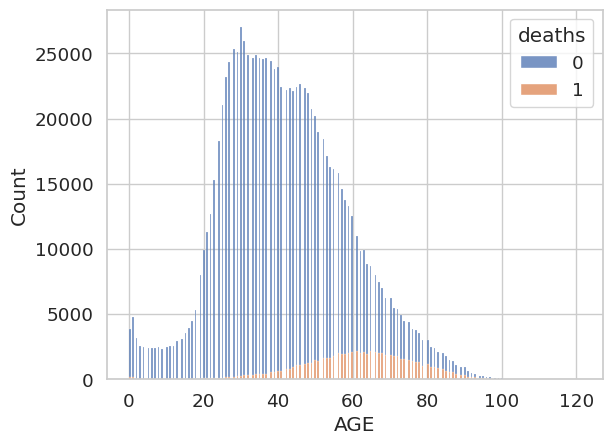

In [ ]:
sns.histplot(data=covid, x="AGE", hue="deaths"
            ,multiple='stack'
            )

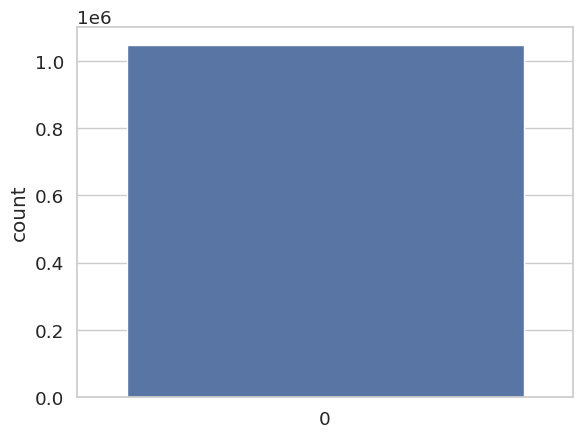

In [ ]:
ax = sns.countplot(covid['deaths']);

<Axes: xlabel='MEDICAL_UNIT', ylabel='Count'>

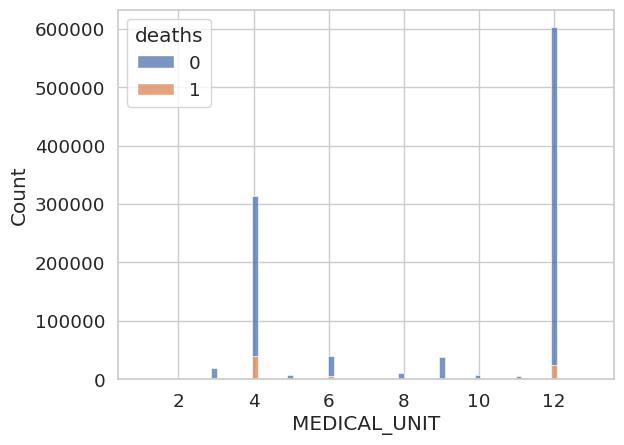

In [ ]:
sns.histplot(data=covid, x="MEDICAL_UNIT", hue="deaths"
            ,multiple='stack'
            )

# CORRELACIÓN

En la siguiente tabla utilizaremos un analisis de correlación de Pearson, el cual nos ayudara a analizar cuales variables se encuentran fuertemente relacionadas entre ellas, podemos observar por ejemplo la fuerte correlación entre muertes y tipo de paciente, si se encontraba intubado, contaba con enfermedad de pneumonia, asi como la edad.

<ipython-input-115-d481c91e0ed2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = covid.corr(method='pearson')


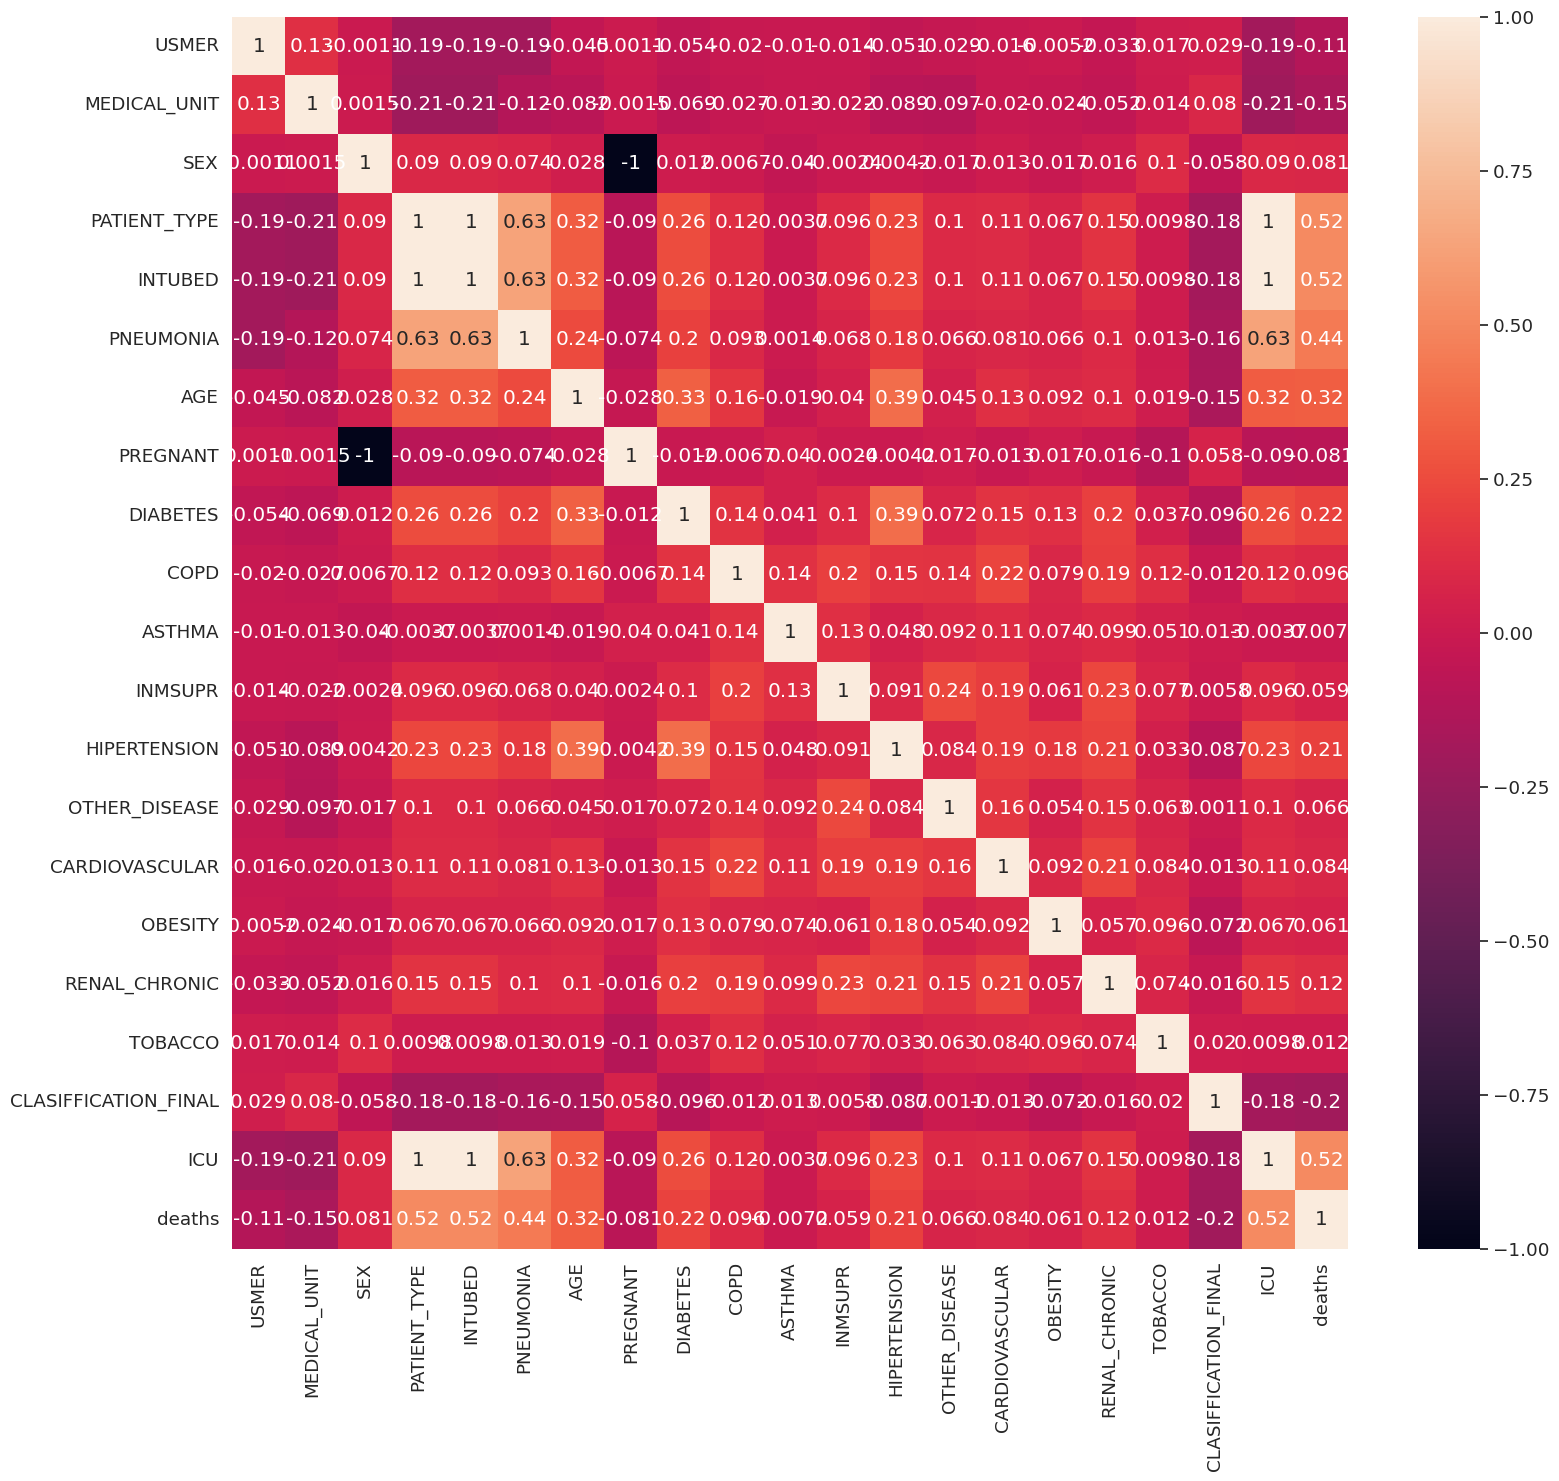

In [ ]:
corr_df = covid.corr(method='pearson') 
 
plt.figure(figsize=(18, 16))
 
sns.heatmap(corr_df,annot=True)
plt.show()

Eliminación y division de columnas para entrenamiento, escogemos en "y" la columna de interes que son "muertes o deaths"

In [ ]:
X = covid.drop(['deaths','DATE_DIED'],axis= 1)

y = covid['deaths']


In [ ]:
X.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,1,65,1,0,0,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,0,1,72,0,0,0,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,1,0,55,0,1,0,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,0,0,53,1,0,0,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,0,0,68,0,1,0,0,0,1,0,0,0,0,0,3,0


In [ ]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,1,65,1,0,0,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,0,1,72,0,0,0,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,1,0,55,0,1,0,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,0,0,53,1,0,0,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,0,0,68,0,1,0,0,0,1,0,0,0,0,0,3,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deaths, dtype: int64

# ENTRENAMIENTO ML Regresion Logistica

Entrenamiento con un 75% de Entrenamiento y 25% de Prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

In [ ]:
y_train

262597    0
296660    0
586363    0
453004    1
720670    0
         ..
704375    0
199301    0
794508    0
446197    1
794056    0
Name: deaths, Length: 786431, dtype: int64

In [ ]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9371681213378906


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[237373   5664]
 [ 10807   8300]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    243037
           1       0.59      0.43      0.50     19107

    accuracy                           0.94    262144
   macro avg       0.78      0.71      0.73    262144
weighted avg       0.93      0.94      0.93    262144



Conclusiones:
El modelo de Regresion Logistico muestra un accuracy del 0.937 lo cual nos da un muy buen valor para validar el dataset 

Entrenamiento ML Decision Three

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = DecisionTreeClassifier(random_state=435,
                             max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=435)

In [ ]:
y_pred = model.predict(X_test)

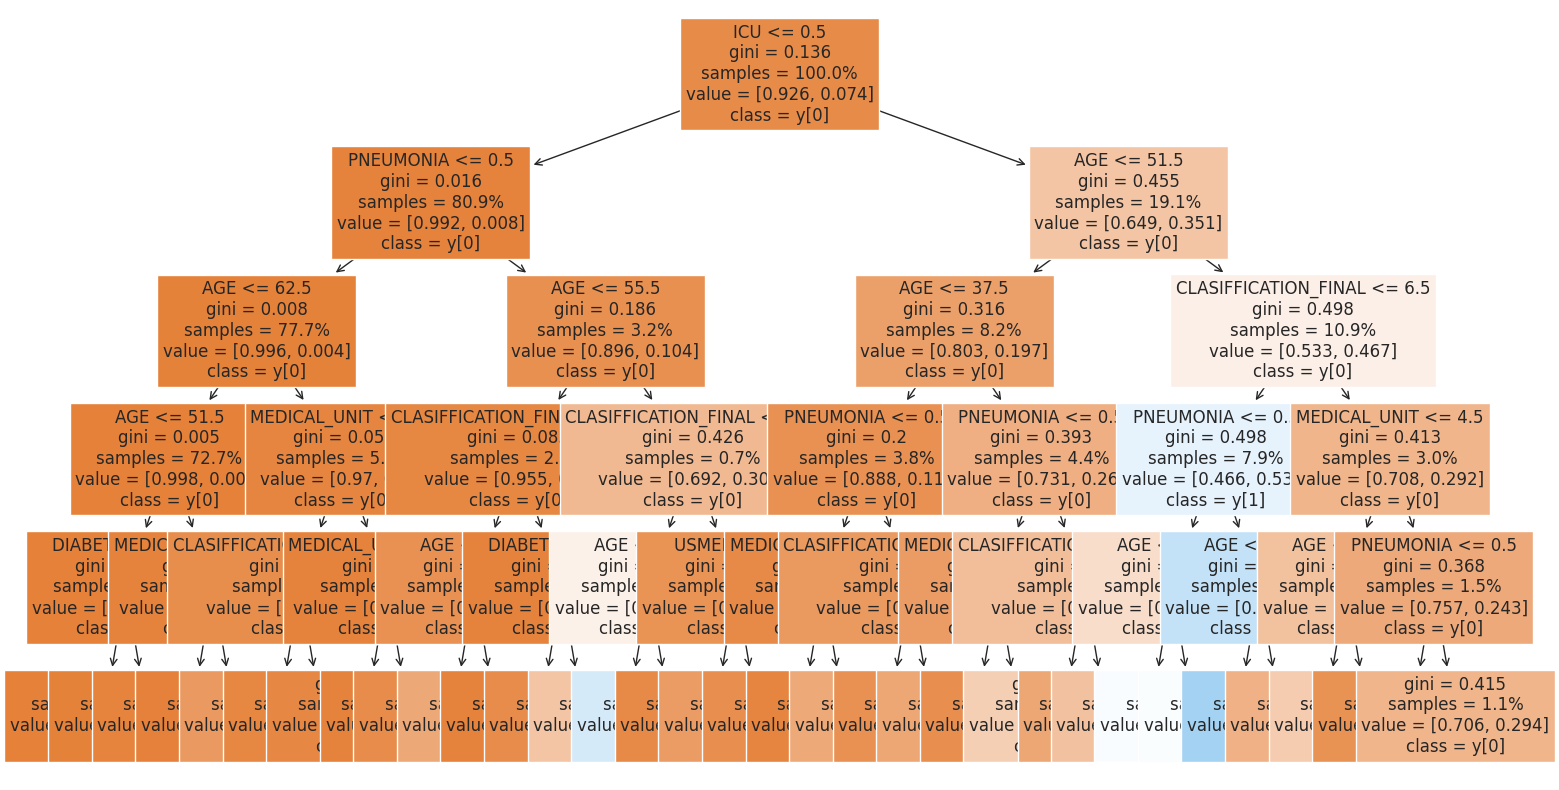

In [ ]:
fig = plt.figure(figsize=(18,10))
tree.plot_tree(model,
               feature_names=X_train.columns,  
               class_names=True,
               fontsize=12,
               proportion=True,
               filled=True
               )

plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[235381   7656]
 [  9019  10088]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    243037
           1       0.57      0.53      0.55     19107

    accuracy                           0.94    262144
   macro avg       0.77      0.75      0.76    262144
weighted avg       0.93      0.94      0.94    262144



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9363899230957031


Eleccion de Modelo de ML, aun y cuando comparten un Acurracy muy cercano entre las dos, el modelo de regresion logistica muestra mejores resultados. 

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0:10]

array([[ 0.76267836, -1.33796168, -0.99929961, -0.48558044, -0.48558044,
        -0.41801308,  0.12927861,  0.99929961, -0.37383609, -0.13251209,
         5.41109558, -0.13113929,  2.30053359, -0.18067012, -0.1532502 ,
         2.33095298, -0.14692987, -0.30184018,  0.90044469, -0.48558044],
       [ 0.76267836, -1.33796168, -0.99929961, -0.48558044, -0.48558044,
        -0.41801308, -0.52138937,  0.99929961, -0.37383609, -0.13251209,
        -0.18480546, -0.13113929, -0.43468176, -0.18067012, -0.1532502 ,
        -0.42900908, -0.14692987, -0.30184018,  0.90044469, -0.48558044],
       [-1.31116872,  0.81071565,  1.00070088,  2.05939102,  2.05939102,
         2.39226965, -0.4030861 , -1.00070088, -0.37383609, -0.13251209,
        -0.18480546, -0.13113929, -0.43468176, -0.18067012, -0.1532502 ,
        -0.42900908, -0.14692987,  3.31301159, -1.2256047 ,  2.05939102],
       [-1.31116872,  0.81071565, -0.99929961,  2.05939102,  2.05939102,
         2.39226965,  2.08128254,  0.99929961,  

In [ ]:
pca = PCA()
X_train_1 = pca.fit_transform(X_train)
X_test_1 = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.11905309e-01, 1.02381438e-01, 9.49848966e-02, 6.61073104e-02,
       5.16039950e-02, 5.08673602e-02, 4.77408593e-02, 4.63205184e-02,
       4.37841264e-02, 4.32486315e-02, 4.12841621e-02, 4.03590155e-02,
       3.83619941e-02, 3.55536054e-02, 3.19224094e-02, 2.80516299e-02,
       2.55227381e-02, 2.40632660e-31, 4.19790118e-32, 1.44027057e-34])

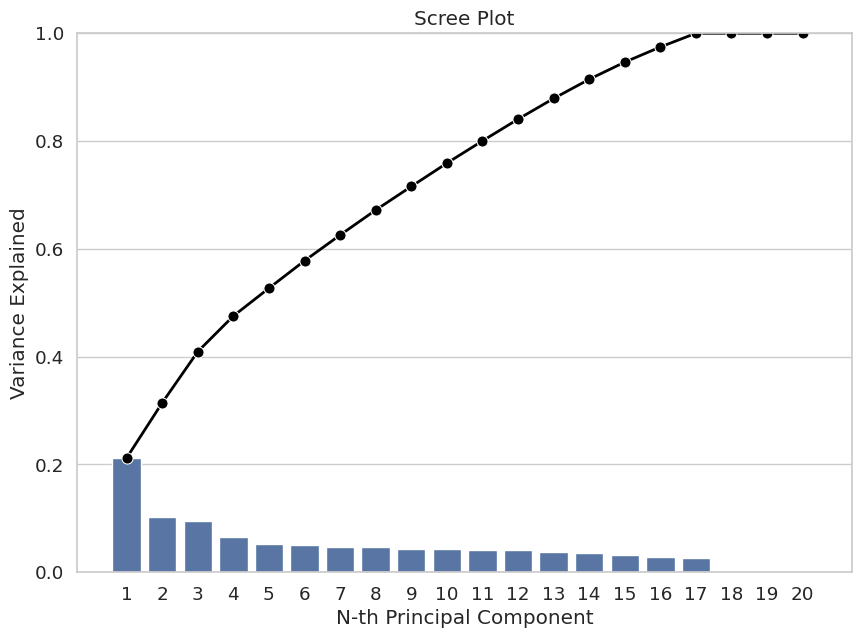

In [ ]:
PC_components = np.arange(pca.n_components_) + 1

figure = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
figure = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
figure = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
PCAlogreg = LogisticRegression(max_iter=1000)
PCAlogreg .fit(X_train, y_train)

# Predicción
y_pred = PCAlogreg .predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.9286346435546875


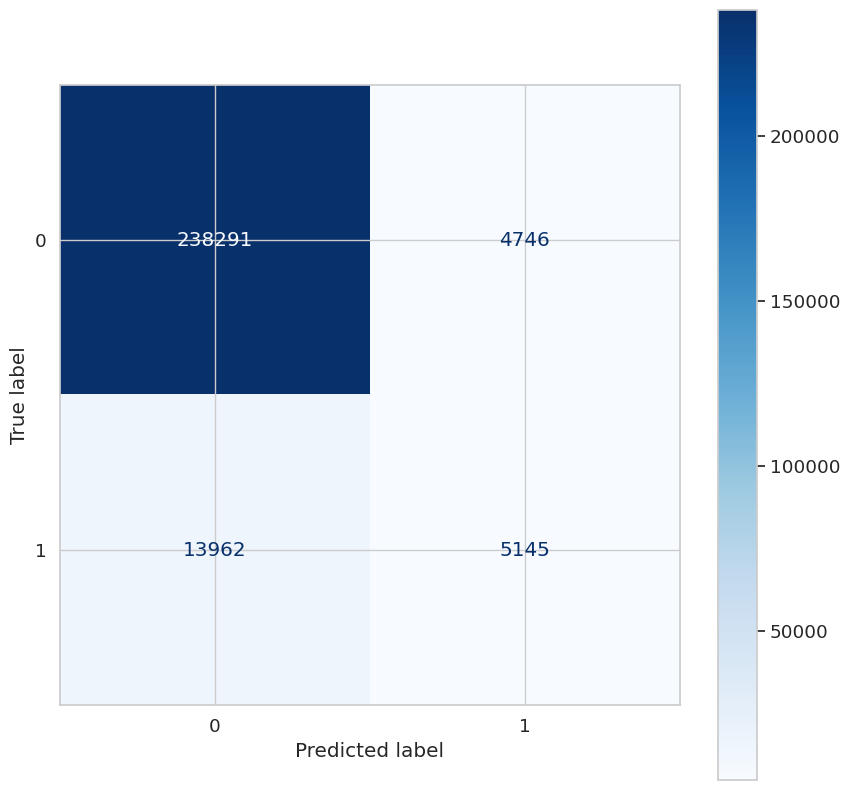

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm = metrics.confusion_matrix(y_test, y_pred, labels=PCAlogreg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=PCAlogreg.classes_)
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

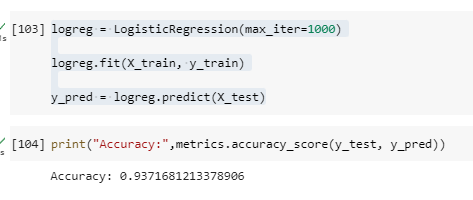

viendo con la comparación inicial sin uso del PCA, vemos como disminuye el accuracy por muy poco %, sin embargo se buscaria tener el mayor valor posible

# Cross Validation

Se agregan librerias de Sklearn para regresion logistica, asi como el modelo de Cross Validate

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

colocamos el codigo para crear el cross validation con 5 dobleces y obtener los valores de cada dobles

In [ ]:
kf = StratifiedKFold(n_splits=5, #dividir en 5 secciones
                     shuffle=True, 
                     random_state=42)

In [ ]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 838860, Test set:209715
Fold:2, Train set: 838860, Test set:209715
Fold:3, Train set: 838860, Test set:209715
Fold:4, Train set: 838860, Test set:209715
Fold:5, Train set: 838860, Test set:209715


In [ ]:
scores = cross_validate(logreg, X, y, scoring='accuracy', cv=5)
print(scores['test_score'])

[0.8623036  0.9140071  0.88707055 0.94166369 0.93057721]


Creamos la variable para guardar el dato

In [ ]:
avg_scores = scores['test_score']

Creamos el promedio de los valores obtenidos y obtenemos el valor final

In [ ]:
print(f'Average score: {"{:.2f}".format(avg_scores.mean())}')

Average score: 0.91


El modelo arroja un 0.91 de accuracy, comparandolo con el modelo anterior que obtuvimos un 0.9371
El modelo se ve afectado principalmente por el Fold 1 y 3, ya que en estas particiones podemos identificar que su Acurracy es mas bajo, comparado con los otros 3 Folds